# Ce e acest articol?

Am încercat să îmi dau seama eu cu cine votez... [hâc](https://ro.wikisource.org/wiki/O_scrisoare_pierdut%C4%83#Scena_VIII)!

Am găsit date despre voturile Camerei Deputaților din februarie 2017 încoace, [pe Parlament Transparent](https://parlament.openpolitics.ro/export/).

Datele din Senat sunt disponibile pe [site-ul Senatului](https://www.senat.ro/Voturiplen.aspx), dar nu le-a aranjat nimeni (încă?) pentru a le putea procesa cu ușurință. Poate o să le aranjez eu mai încolo, folosind un scraper.

Prin aceste date, am vrut să văd ce susțin partidele și cât de similare sunt.
Putem obține astfel o analiză mai obiectivă, ce ia în considerare voturile efectuate, și nu propaganda electorală.

Tot nu cred că această analiză e absolut obiectivă, deoarece unele partide ar putea vota pentru imagine când ar ști că votul lor nu ar avea efect. De asemenea, un partid se comportă într-un fel când e la putere, și altfel când e în opoziție.

Constat că lipsesc datele grupării "PRO Europa", ceea ce înseamnă că datele despre apartenență sunt mai vechi. Nu am ajuns să le actualizez. Oricum, cu excepția dlui. [Balint Liviu](http://www.cdep.ro/pls/parlam/structura2015.mp?idm=19&cam=2&leg=2016), care a fost și prin PMP, ceilalți din PRO Europa au fost doar în PSD sau ALDE.

Vă invit să îmi analizați această analiză și să-mi ziceți ce idei mai aveți. Sper să vă folosească aceste date pentru a decide și a vota!

© 2019 Dan Gheorghe Haiduc - Licență [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)<br />
Distribuirea și modificarea sunt permise numai cu condiția atribuirii autorului.<br />

## Schimbare: vineri, 2019-11-01

Metoda calculării votului normalizat (comparabil între partide) era cam ciudată (abținerile erau considerate diferite de lipsa unui vot sau de absențe). Ca urmare, apăreau diferențe artificiale irelevante dintre partide.

Am decis să iau ca vot normalizat procentul de membri ai partidului (prezenți sau nu) care au votat "da". Astfel, se schimbă toată analiza ce urmează.

[Vezi în Constituție](http://www.cdep.ro/pls/dic/site2015.page?den=act2_1&par1=3#t3c1s3sba76) diferența dintre "votul majorității membrilor" în cazul legilor organice (prezenți sau absenți) și "votul majorității membrilor prezenți" pentru legi ordinare (ce are putere chiar dacă ar fi un singur parlamentar prezent, de exemplu).

Sper că această abordare arată o imagine mai corectă. Cred acest lucru deoarece numărul voturilor de "da" este cel cu efect, și chiar dacă membrii prezenți votează "da", absența multora înseamnă că partidul nu e chiar pe poziția "da".

Totuși, să luăm ca exemplu [acest vot](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20342), unde sunt absenți 32 de membri PNL, 7 USR, 5 UDMR, și 6 PMP.

Pe lângă cei 97 de prezenți ce nu au votat "da", dacă acești absenți s-ar fi prezentat și votat, ar fi ajuns la 147, și ar fi depășit cele 136 de voturi "da", iar această lege ordinară nu ar fi fost adoptată.

În ce măsură credeți că absențele au fost intenționate, într-un joc politic? O analiză ce ar estima acest lucru ar fi foarte sofisticată; iar cea pe care o citiți nu ia în considerare absențele ca vot "pro".

# Încărcare date

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
pd.options.display.max_rows = 100

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6, 6]

import seaborn as sns
sns.set()

from scipy.optimize import minimize

# Date obtinute de la Parlament Transparent, Popescu, Marina și Chiru, Mihail.
# https://parlament.openpolitics.ro/export/
# Datele pot fi reutilizate sub licență CC-BY-SA-4.0 sau CC-BY-SA-3.0-RO
# Datele se refera doar la Camera Deputatilor (nu si Senat).

!wget -nc https://parlament.openpolitics.ro/export/membri_grupuri.csv
!wget -nc https://parlament.openpolitics.ro/export/voturi.csv

File ‘membri_grupuri.csv’ already there; not retrieving.

File ‘voturi.csv’ already there; not retrieving.



In [2]:
# Ordonare obiectivă: putere (PSD) -> opoziție (partide nesimilare cu PSD)
coloane_partide = ['PSD', 'Minorități', 'ALDE', 'UDMR', 'Neafiliați', 'PNL', 'USR', 'PMP']
descriere_partide = [
    'Grupul parlamentar al Partidului Social Democrat',
    'Grupul parlamentar al minorităţilor naţionale',
    'Grupul parlamentar ALDE (Alianţa liberalilor şi democraţilor)',
    'Grupul parlamentar al Uniunii Democrate Maghiare din România',
    'Deputati neafiliati',
    'Grupul parlamentar al Partidului Naţional Liberal',
    'Grupul parlamentar al Uniunii Salvaţi România',
    'Grupul parlamentar al Partidului Mişcarea Populară',
]


membri = pd.read_csv('membri_grupuri.csv')

for partid, abrev in zip(descriere_partide, coloane_partide):
    membri = membri.replace(partid, abrev)

voturi = pd.read_csv('voturi.csv')
voturi_cu_partide = voturi.merge(membri[['nume', 'partid']])
voturi_cu_partide['partid'].fillna('niciunul curent', inplace=True)
voturi_cu_partide

,data,cod cdep,nume,vot,vot grup,partid
0,2017-02-14,16105,Antoneta Ioniţă,da,da,PNL
1,2017-02-14,16106,Antoneta Ioniţă,da,da,PNL
2,2017-02-14,16107,Antoneta Ioniţă,da,da,PNL
3,2017-02-14,16108,Antoneta Ioniţă,nu,nu,PNL
4,2017-02-14,16109,Antoneta Ioniţă,da,da,PNL
...,...,...,...,...,...,...
415760,2019-10-22,22897,Andrian Ampleev,da,da,Minorități
415761,2019-10-22,22898,Andrian Ampleev,da,da,Minorități
415762,2019-10-22,22899,Andrian Ampleev,da,da,Minorități
415763,2019-10-22,22900,Andrian Ampleev,da,da,Minorități


# Top partide după voturi rebele

Această analiză a fost făcută deja aici, până la 5 iulie 2018: https://parlament.openpolitics.ro/statistici/vot-rebel

Observ că rata "rebeliunii" e destul de mică, și nu consider că ar avea vreo influență în votul meu. Decid să nu caut detalii aici. Dar dacă îmi trimiteți cod pe tavă și mă rugați să îl includ, o să o fac.

# Procesare: voturi în funcție de partide

In [3]:
grupate = voturi_cu_partide.groupby(['cod cdep', 'vot', 'partid'], as_index=False).count().sort_values(['cod cdep', 'vot', 'partid'])
grupate = grupate.pivot_table(index='cod cdep', columns=['partid', 'vot'], values=['data'])['data'].fillna(0)
grupate

partid       ALDE                 Minorități                 Neafiliați        \
vot      abținere    da   nu    —   abținere    da   nu    —   abținere    da   
cod cdep                                                                        
16105         0.0  13.0  2.0  0.0        0.0  14.0  0.0  0.0        0.0  20.0   
16106         0.0  13.0  2.0  0.0        1.0  13.0  0.0  0.0        0.0  20.0   
16107         1.0  14.0  0.0  0.0        0.0  14.0  0.0  0.0        0.0  20.0   
16108         0.0  10.0  5.0  0.0        0.0  13.0  1.0  0.0        0.0  20.0   
16109         0.0  15.0  0.0  0.0        0.0  14.0  0.0  0.0        0.0  20.0   
...           ...   ...  ...  ...        ...   ...  ...  ...        ...   ...   
22897         0.0  14.0  0.0  0.0        0.0  12.0  0.0  0.0        0.0  12.0   
22898         0.0  15.0  0.0  0.0        0.0  13.0  0.0  0.0        1.0  11.0   
22899         0.0  14.0  0.0  0.0        1.0  13.0  0.0  0.0        0.0  12.0   
22900         0.0  15.0  0.0  0.0        0.0  14.0  0.0  0.0        0.0  12.0   
22901         9.0   4.0  0.0  0.0        3.0  11.0  0.0  0.0        0.0   9.0   

partid    ...  PSD          UDMR                      USR                   
vot       ...   nu    — abținere    da   nu    — abținere    da    nu    —  
cod cdep  ...                                                               
16105     ...  4.0  0.0      0.0  21.0  0.0  0.0      0.0  23.0   0.0  1.0  
16106     ...  4.0  0.0      0.0  21.0  0.0  0.0      0.0  23.0   1.0  0.0  
16107     ...  0.0  0.0      0.0  21.0  0.0  0.0      0.0  24.0   0.0  0.0  
16108     ...  4.0  0.0      0.0  21.0  0.0  0.0      0.0  24.0   0.0  0.0  
16109     ...  2.0  0.0      0.0  21.0  0.0  0.0      0.0  24.0   0.0  0.0  
...       ...  ...  ...      ...   ...  ...  ...      ...   ...   ...  ...  
22897     ...  0.0  0.0      0.0  16.0  0.0  0.0      0.0  25.0   0.0  0.0  
22898     ...  0.0  0.0      0.0  17.0  0.0  0.0      0.0  25.0   0.0  0.0  
22899     ...  0.0  0.0      0.0  17.0  0.0  0.0      0.0  25.0   0.0  0.0  
22900     ...  0.0  0.0      0.0  17.0  0.0  0.0      0.0  25.0   0.0  0.0  
22901     ...  1.0  0.0      0.0  16.0  0.0  0.0      0.0   0.0  25.0  0.0  

[1601 rows x 32 columns]

# Subiecte de vot: top abțineri

In [4]:
vot = 'abținere' # poți alege și: 'da', 'nu', '—'

from IPython.core.display import display, HTML, Markdown

# Atenție! Comentariile sunt subiective și reprezintă doar interpretarea mea.
comentarii_voturi = {
    ## Voturi specifice PSD:
    20603: 'transpunerii unei legi UE împotriva spălării banilor, cu o excepție neconstituțională pentru minorități',
    20604: 'reglementării operațiunilor petroliere pe următorii 45 de ani, pe repede-nainte, în lipsa datelor',
    21110: 'stabilirii prin lege a unor criterii de performanță a funcționarilor publici',
    21325: 'centralizării administrației ariilor naturale protejate, și eliminării ONG-urilor ce se ocupau de ele (încercarea nr. 1)',
    22586: 'centralizării administrației ariilor naturale protejate, și eliminării ONG-urilor ce se ocupau de ele (încercarea nr. 2)',
    22235: 'respingerea scutirii de impozit local pentru persoane persecutate politic, din cauza abrogării legii la care face referire',
    22364: 'unei schimbări neconstituționale ale Codului de Procedură Penală',
    22468: 'alegerii decanilor prin vot, nu cum e acum, prin numire de către rector',
    22763: 'vacantării lui Octavian Goga, deputat PSD condamnat penal',
    22380: 'modificării Legii fondului funciar 18/1991 a.î. să permită cereri de reconstituire a dreptului la proprietate oricând',
    22732: 'unor schimbări în legătură cu comisiile permanente a CDEP; dar nu am înțeles ce după ce am citit [modificarea propusă](http://www.cdep.ro/pls/proiecte/docs/2019/ph045_pl573.pdf)',
    22764: 'modificării ordinii de vot pentru a-l vacanta pe Octavian Goga, deputat PSD ce trebuie demis, înainte de a-i permite să voteze pentru o moțiune de cenzură.',
    22079: 'anchetei despre neutralitatea Consiliul Național al Audiovizualului în 2018-2019',
    20403: 'anchetei despre reprimarea protestului pașnic din 10 august 2018',
    22463: 'înfiinţării Agenţiei pentru Calitatea şi Marketingul Produselor Agroalimentare - pentru că [13000 de agenții deja existente nu sunt destule](http://www.cdep.ro/pls/steno/steno2015.stenograma?ids=8064&idm=15).',
    20071: 'obligării la a încerca medierea, în caz contrar pierzând dreptul la judecată (prima încercare)',
    22363: 'obligării la a încerca medierea, în caz contrar pierzând dreptul la judecată (din nou; dar a devenit [lege](http://legislatie.just.ro/Public/DetaliiDocument/216614))',
    22460: 'abilitării Guvernului de a emite ordonanțe cât timp Parlamentul e în vacanță (până în septembrie)',
    22587: 'eliminării necesității autorizațiilor de mediu la 5 sau 10 ani, înlocuire cu viză anuală (fără inspecții?)',
    20717: 'rămânerii la vot într-un singur tur pentru alegerile locale, și nu două tururi. [PSD a câștigat multe primării printr-un singur tur](https://ro.wikipedia.org/wiki/Alegeri_locale_%C3%AEn_Rom%C3%A2nia,_2016).',
    ## Voturi specifice ALDE:
    20402: 'evaluării eficienței combaterii pestei porcine africane',
    20342: 'deblocării vânzărilor de lemne? (nu prea am înțeles)',
    22362: 'obligării BNR să readucă aurul în țară. Interesant! [Stenograma dezbaterii dinainte de vot e aici.](http://www.cdep.ro/pls/steno/steno2015.stenograma?ids=8056&idm=6).',
    ## Voturi specifice Minorități
    16498: 'Control buget de stat 2016 - nici un reprezentant Minorități nu a votat',
    16894: 'Contra punerii în valoare cetăților dacice din Munții Orăștiei (au invocat sinecuri)',
    16887: 'respingerii declarării de rezervații arheologice',
    16490: 'permiterii în continuare a libertății religioase, chiar și nerecunoscute de Guvern (Legea 489/2006)',
    16696: 'pentru păstrarea auditului de siguranță rutieră la infrastructură nouă',
    16694: 'contra înființării Institutului de Studii Avansate pentru Cultura şi Civilizaţia Levantului în subordinea Senatului',
    21028: 'înființării unei agenții de sistem dual (PNL, USR zic că ar fi doar pentru sinecuri)',
    20417: 'anchetei privind interceptări ilegale cerute de Dragnea',
    ## Voturi specifice UDMR:
    17001: 'transmiterii de infrastuctură portuară din domeniul național în domeniul județului Tulcea, în scop turistic',
    17000: 'reglementării auditului financiar conform UE',
    16997: 'stimulării ocupării de locuri de muncă',
    22871: 'simplificării extinderilor cimitirelor',
    20418: 'implementarea unei legi UE privind distribuţia de asigurări',
    22365: 'unei legi PSD-ALDE anticorupție, cu dedicație pentru Dragnea (a doua încercare)',
    20136: 'unei legi PSD-ALDE anticorupție, cu dedicație pentru Dragnea (cu timp insuficient pentru dezbatere)',
    20343: 'contra monopolului artificial creat de "zone unitare" ale furnizorilor locali de energie termică',
    22472: 'pentru evaluări cu "Foarte Bine", "Bine" etc. la sport, în loc de note până la 10, pentru combaterea absenteismului la sport în școli',
    19094: 'respingerii autonomiei Ținutului Secuiesc',
    19235: 'redefinirii mai largi a terorismului',
    20416: 'modificării componenței comisiilor permanente ale CDEP',
    22590: 'unor modificări complexe asupra legilor electorale pentru facilitarea diasporei (nu am putut citi [legea](http://legislatie.just.ro/Public/DetaliiDocument/216577), e mare.)',
    17289: 'respingerii reducerii pragului de 20% pentru folosirea limbilor materne minoritare în administrația publică locală, la 10% din populație, printre altele',
    19452: 'restructurării Agenţiei Naționale pentru Arii Naturale Protejate pentru evitarea personalității juridice redundante la nivel local. UDMR vrea și birocrație locală, nu doar centrală.',
    18786: 'contra unor schimbări de organizare despre Centenarul României. Stenograma dezbaterii dinaintea votului lipsește de pe pagina [proiectului de lege](http://www.cdep.ro/pls/proiecte/upl_pck2015.proiect?idp=16603)! [Am găsit-o aici](http://www.cdep.ro/pls/steno/steno2015.stenograma?ids=7884&idm=9&idl=1).',
    19318: 'ceva cu reglementarea fondurilor europene; mi-e greu de înțeles ce se întâmplă aici',
    20722: 'pentru extra zile de vacanță',
    20998: 'pentru prelungirea învățământului obligatoriu de la 10 clase la 11',
    18628: 'contra înființării punctelor de control vamal sanitar-veterinar sub ANSVSA și certificate ORNISS (secrete de stat) pentru șefii acestora',
    18840: 'folosirea cu prioritate de fonduri europene, unde acestea sunt eligibile',
    17367: 'abținere de la aprobarea contului de execuție al Camerei Deputaților pentru 2016 (ce înseamnă această abținere???)',
    22528: 'abținere de la modificarea contravențiilor silvice, pe motiv că sunt unele lacune (amenzi prea mici)',
    21116: 'nu susține referendumuri locale în același timp cu cel național pentru revizuirea Constituției',
    16468: 'respingerii internetului gratuit în clădirile administrației publice, **teraselor, barurilor, și altor unități de alimentație publică, precum și obligarea furnizării de 500MB lunar de internet pe mobil**',
    22523: 'reglementării tratamentului așezărilor informale d.p.d.v. urbanistic',
    20129: 'aprobării OUG privind OUG privind regimul străinilor rezidenți pe termen lung, după o scrisoare de la UE în care atenționează România cu implementarea legii UE',
    ## Voturi specifice PNL:
    20598: 'autorizării Ministerului Finanțelor Publice de a vinde certificate de emisii de gaze cu efect de seră, UDMR propune Ministerului Mediului',
    20647: 'înființării Gărzii Forestiere',
    20656: 'permiterii detașării a mai multor cadre didactice',
    16217: 'respingerii prelungirii termenului de răspuns al ANPC în cazul serviciilor financiare',
    16292: 'respingerii publicării datelor de interes public de către instituțiile publice locale sau județene',
    20500: 'adaptării legii apelor la legislația europeană, cu unele neajunsuri [reclamate de PNL](http://www.cdep.ro/pls/steno/steno2015.stenograma?ids=7970&idm=12)',
    16625: 'respingerii condiționării la persoane în dificultate a ajutoarelor de încălzire de la primării. Aici înțeleg eu greșit [legea](http://legislatie.just.ro/Public/DetaliiDocument/209205), sau toată lumea a votat pe dos (pentru a permite primăriilor să acorde ajutoare în continuare și persoanelor ce nu au nevoie de ajutor?)',
    17198: 'respingerii adăugării cursurilor de prim ajutor în programa școlară, prin Legea Învățământului (și nu prin planuri-cadru cum se stabilește programa școlară în mod normal)',
    21032: 'abilitării Institutului de Cercetare "Cantacuzino" să certifice vaccinuri produse în România (n. aut: votul PNL mă face să cred că partidul are interesul de a importa vaccinuri)',
    ## Voturi specifice USR sau PMP:
    20649: 'desființării transportului public București de la Ministerul Transportului (cu consecința de a o înmâna consiliului local)',
    16116: 'respingerii separării alocației pentru copii în venitul minim garantat (această propunere e o dublură a ce s-a întâmplat deja)',
    16138: 'respingerii unei soluții parțiale pentru invocarea malpraxisului de către succesorii pacienților decedați; o altă soluție (completă) nu a fost implementată încă',
    16141: 'respingerii centralizării achizițiilor pentru medicină școlară',
    16143: 'respingerii asistării cabinetelor de medicină școlară din bugetul de stat sau local',
    16144: 'respingerii autonomiei CNAS făcând referire la o numerotare veche a Legii 95/2006 a sănătății',
    16222: 'respingerii unui fond pentru sprijinirea cetățenilor români în situații grave în străinătate',
    18586: 'nu susține înzestrarea și responsabilizarea în locul primarilor unui "resort al aparatului de specialitate al primarului" cu terenuri proprietatea UAT-urilor, precum nici concesionarea terenurilor UAT de către proprietarii construcțiilor de pe acele terenuri (??? complicat)',
    19232: 'nu susține legea privind obligații de securitate ale furnizorilor de servicii digitale esențiale pentru societate',
    22896: 'nu susține OUG privind scutirea de impozit a entităților nerezidente sau juridice rezidente ce organizează Turneul final al Campionatului European de Fotbal 2020',
    22240: 'pentru contribuții în plus la CAS din partea a mari contribuabili',
    16346: 'contra prelungirii termenului de dezbatere PLx 10/2017 (reformare DIICOT) și PLx 12/2017 (clarificări legea educației)',
    16297: 'eliminării scutirii de detenție cu 30 de zile pentru fiecare lucrare științifică sau invenție brevetată (prevăzute în [Legea nr. 254/2013 art. 96 (1) f)](http://legislatie.just.ro/Public/DetaliiDocument/150699#id_artA830_ttl) ) - această lege a fost oricum schimbată ulterior la 20 de zile scutite în total, oricare ar fi numărul de lucrări publicate sau brevetate.',
    20318: 'despre recepția unor lucrări la Palatul Parlamentului',
    16605: 'pentru un nou cadru legal al adopției, simplificat, dar care nu e în acord cu acorduri internaționale. [Acum situația s-a îmbunătățit (la capătul documentului e un grafic).](www.copii.ro/anpdca-content/uploads/2017/07/Statistica-adoptii-2017-pentru-site-la-31-mai.docx)',
    19412: 'voturi contra schimbării Codului de procedură civilă (în favoarea PSD? e o lege complexă și nu îmi pot da seama ușor; USR motivează că nu a fost suficient timp pentru dezbateri).',
    16151: 'respingerii abrogării unei legi deja abrogate (despre sesizări disciplinare ale șefilor sau demnitarilor)',
    16153: 'respingerii scăderii TVA la 9% pentru aparatură medicală, din cauza schimbării Codului Fiscal între timp',
    16154: 'respingerii reducerii TVA la 9% pentru livrări de bunuri sau servicii pentru diagnostice medicale, după ce obiectul legii (Codul fiscal) a fost înlocuit',
    16158: 'respingerii înființării unor structuri organizatorice ale administrației locale ce ar administra cabinete medicale școlare',
    16194: 'respingerii unei OUG dublate ce permite Guvernului să stabilească prețul maximal al medicamentelor',
    16209: 'respingerii obligării la licență pentru exportul de lemn în stare brută',
    16216: 'respingerii de a considera Teatrului Evreiesc de Stat pentru spor de activitate de importanță națională, după ce legea referită ca bază a fost înlocuită',
    16280: 'instituirii zilei naționale a pădurilor',
    16497: 'păstrării dreptului de antenă a candidaților electorali independenți la 5 minute pe întreaga campanie, și nu mărirea acestora la 30',
    20645: 'explicitării turnurilor de turbini eoliene drept clădiri, cf. Codului Fiscal',
    22277: 'nu susține OUG pentru prorogarea unor termene, [în special cel referitor la salariul minim????](http://www.cdep.ro/pls/steno/steno2015.stenograma?ids=8050&idm=14,014) Dacă poate cineva să îmi explice, aș aprecia enorm.',
    22275: 'contra unei legi prelungiri de acreditări privind transplante și bănci de organe, unde [un om condamnat pentru trafic de ovocite a fost autorul acestor acreditări](http://www.cdep.ro/pls/steno/steno2015.stenograma?ids=8050&idm=12)',
    20128: 'împotriva OUG ce permite extinderea angajărilor la primării',
    20131: 'Nu sprijină exonerarea celor ce au beneficiat fraudulos de ajutoare de urgență privind venitul minim garantat',
    16569: 'respingerii fixării probelor de bacalaureat în lege, în locul metodologiei Ministerului Educației Naționale',
    22194: 'pentru păstrarea necesității avizului de însoțire a mărfii vegetale în transportul rutier',
    20650: 'pentru expirarea unei legi ce menține un monopol de stat privind inspecția unor utilaje sub presiune, de ridicat, sau consumatoare de combustibil',
    16788: 'contra măririi salariilor unor bugetari, burselor studenților și gratuității transportului feroviar pentru studenți',
    16854: 'adăugării mai multor orașe (Târgu Mureș, Slatina, Turnu Măgurele, Râmnicu Vâlcea) la pensie anticipată parțială din cauza poluării',
    17262: 'anchetei despre pensionarea şi reangajarea aceloraşi persoane în MAI',
    
    ## Voturi multi-partid (caracteristice spațiului ideologic de la sfârșitul paginii)
    20120: 'readucerii pe ordinea de zi a voturilor amânate de PSD',
    16855: 'înființării de centre de excelență *cu personalitate juridică* pentru elevi ([acuzată de a crea sinecuri](http://www.cdep.ro/pls/steno/steno2015.stenograma?ids=7791&idm=6))',
    18985: 'înlesnirii detașării profesorilor, pentru a preda la o altă școală fără să fi făcut concurs pentru ea',
    16313: 'circului pentru achiziția operei de Brâncuși "Cumințenia Pământului"',
    16117: 'respingerii creșterii duratei concediului paternal de la 10 zile la 15',
    16127: 'respingerii recunoașterii reciproce a cotizației dintre sistemul public și privat de pensii pentru pensionare anticipată',
    21084: 'permutării a doi membri PSD în comisiile permanente ale CDEP',
    21085: 'aprobării bugetului CDEP pentru anul 2019; au crescut cheltuielile cu 15% (salarii, pensii speciale)',
    21087: 'împăcării unor legi despre achiziții publice',
    21092: 'scoaterii normativelor de cost pentru investiții din fonduri publice (pentru unii, cec în alb, pentru alții, deblocarea investițiilor)',
}

def detalii_vot(cod_cdep, rand):
    scor = rand[0]
    pozitie = ''
    
    comentariu = f"{comentarii_voturi.get(cod_cdep, '')}"
    if comentariu:
        pozitie = rand.get('pozitie', '')
        if not pozitie:
            pozitie = 'în vederea'
    
    display(Markdown(f"[Vot {cod_cdep}](http://www.cdep.ro/pls/steno/evot2015.nominal?idv={cod_cdep}): scor {scor:.3f} {pozitie} {comentariu}"))

def link_cdep(df, nr_top=10, titlu=None):
    if isinstance(df, pd.Series):
        df = pd.DataFrame(df)
    
    if titlu:
        display(Markdown(f"### {titlu}"))
    top = df.sort_values(by=df.columns[0], ascending=False).head(nr_top)
    
    for cod, rand in top.iterrows():
        detalii_vot(cod, rand)
    
link_cdep(grupate.loc[:, (slice(None), vot)].sum(axis=1), titlu=f'Top voturi de "{vot}"')
link_cdep(321-grupate.loc[:, :].sum(axis=1), titlu=f'Top absențe')

### Top voturi de "abținere"

[Vot 22468](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22468): scor 174.000 în vederea alegerii decanilor prin vot, nu cum e acum, prin numire de către rector

[Vot 22764](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22764): scor 105.000 în vederea modificării ordinii de vot pentru a-l vacanta pe Octavian Goga, deputat PSD ce trebuie demis, înainte de a-i permite să voteze pentru o moțiune de cenzură.

[Vot 20644](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20644): scor 104.000  

[Vot 22380](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22380): scor 101.000 în vederea modificării Legii fondului funciar 18/1991 a.î. să permită cereri de reconstituire a dreptului la proprietate oricând

[Vot 20642](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20642): scor 101.000  

[Vot 22078](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22078): scor 95.000  

[Vot 16287](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16287): scor 94.000  

[Vot 20524](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20524): scor 94.000  

[Vot 22732](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22732): scor 94.000 în vederea unor schimbări în legătură cu comisiile permanente a CDEP; dar nu am înțeles ce după ce am citit [modificarea propusă](http://www.cdep.ro/pls/proiecte/docs/2019/ph045_pl573.pdf)

[Vot 16539](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16539): scor 93.000  

### Top absențe

[Vot 22437](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22437): scor 216.000  

[Vot 17426](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17426): scor 206.000  

[Vot 20203](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20203): scor 189.000  

[Vot 22291](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22291): scor 186.000  

[Vot 22300](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22300): scor 186.000  

[Vot 19182](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19182): scor 185.000  

[Vot 22299](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22299): scor 183.000  

[Vot 22763](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22763): scor 166.000 în vederea vacantării lui Octavian Goga, deputat PSD condamnat penal

[Vot 22120](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22120): scor 159.000  

[Vot 22094](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22094): scor 154.000  

# Subiecte de vot caracteristice partidelor

Pentru fiecare partid, o să vedem top 10 subiecte de vot ce diferențiază acel partid de altele.

Notă: pentru cei neafiliați nu putem vota. Prin urmare, nu o să analizez activitatea acestora.

In [5]:
def normalize():
    vot_relativ = pd.DataFrame(index=grupate.index, columns=coloane_partide)
    total_membri = grupate[:].max().max(level='partid')
    
    for p in coloane_partide:
        vot_relativ.loc[:, p] = grupate.loc[:, (p,'da')] / total_membri[p]
    return vot_relativ

# Pondere de 1 pentru partidul în vedere, și -1 pentru medie
normalizat = normalize()

medie = normalizat.mean(axis=1)

for partid in coloane_partide:
    pozitie = normalizat[partid] - medie
    scor = abs(pozitie)
    pozitie = np.sign(pozitie/scor).replace({-1: 'contra', 1: 'pro'})
    scor.name = 'scor'
    pozitie.name = 'pozitie'
    
    
    link_cdep(
        pd.concat([scor, pozitie], axis=1).sort_values(by=scor.name, ascending=False), 
        nr_top=10, 
        titlu=f"Voturi specifice {partid}:"
    )

### Voturi specifice PSD:

[Vot 22362](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22362): scor 0.699 pro obligării BNR să readucă aurul în țară. Interesant! [Stenograma dezbaterii dinainte de vot e aici.](http://www.cdep.ro/pls/steno/steno2015.stenograma?ids=8056&idm=6).

[Vot 22763](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22763): scor 0.639 contra vacantării lui Octavian Goga, deputat PSD condamnat penal

[Vot 22363](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22363): scor 0.638 pro obligării la a încerca medierea, în caz contrar pierzând dreptul la judecată (din nou; dar a devenit [lege](http://legislatie.just.ro/Public/DetaliiDocument/216614))

[Vot 22764](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22764): scor 0.635 contra modificării ordinii de vot pentru a-l vacanta pe Octavian Goga, deputat PSD ce trebuie demis, înainte de a-i permite să voteze pentru o moțiune de cenzură.

[Vot 22365](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22365): scor 0.604 pro unei legi PSD-ALDE anticorupție, cu dedicație pentru Dragnea (a doua încercare)

[Vot 20604](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20604): scor 0.603 pro reglementării operațiunilor petroliere pe următorii 45 de ani, pe repede-nainte, în lipsa datelor

[Vot 20136](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20136): scor 0.600 pro unei legi PSD-ALDE anticorupție, cu dedicație pentru Dragnea (cu timp insuficient pentru dezbatere)

[Vot 21110](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21110): scor 0.594 pro stabilirii prin lege a unor criterii de performanță a funcționarilor publici

[Vot 20603](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20603): scor 0.587 pro transpunerii unei legi UE împotriva spălării banilor, cu o excepție neconstituțională pentru minorități

[Vot 22364](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22364): scor 0.583 pro unei schimbări neconstituționale ale Codului de Procedură Penală

### Voturi specifice Minorități:

[Vot 16490](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16490): scor 0.674 contra permiterii în continuare a libertății religioase, chiar și nerecunoscute de Guvern (Legea 489/2006)

[Vot 21028](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21028): scor 0.634 pro înființării unei agenții de sistem dual (PNL, USR zic că ar fi doar pentru sinecuri)

[Vot 21325](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21325): scor 0.556 pro centralizării administrației ariilor naturale protejate, și eliminării ONG-urilor ce se ocupau de ele (încercarea nr. 1)

[Vot 22235](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22235): scor 0.548 pro respingerea scutirii de impozit local pentru persoane persecutate politic, din cauza abrogării legii la care face referire

[Vot 21052](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21052): scor 0.525  

[Vot 22463](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22463): scor 0.521 pro înfiinţării Agenţiei pentru Calitatea şi Marketingul Produselor Agroalimentare - pentru că [13000 de agenții deja existente nu sunt destule](http://www.cdep.ro/pls/steno/steno2015.stenograma?ids=8064&idm=15).

[Vot 21082](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21082): scor 0.517  

[Vot 22226](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22226): scor 0.509  

[Vot 22078](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22078): scor 0.505  

[Vot 21096](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21096): scor 0.505  

### Voturi specifice ALDE:

[Vot 20604](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20604): scor 0.639 pro reglementării operațiunilor petroliere pe următorii 45 de ani, pe repede-nainte, în lipsa datelor

[Vot 22362](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22362): scor 0.594 pro obligării BNR să readucă aurul în țară. Interesant! [Stenograma dezbaterii dinainte de vot e aici.](http://www.cdep.ro/pls/steno/steno2015.stenograma?ids=8056&idm=6).

[Vot 21082](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21082): scor 0.579  

[Vot 20603](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20603): scor 0.578 pro transpunerii unei legi UE împotriva spălării banilor, cu o excepție neconstituțională pentru minorități

[Vot 22381](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22381): scor 0.559  

[Vot 21100](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21100): scor 0.559  

[Vot 20602](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20602): scor 0.558  

[Vot 22363](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22363): scor 0.548 pro obligării la a încerca medierea, în caz contrar pierzând dreptul la judecată (din nou; dar a devenit [lege](http://legislatie.just.ro/Public/DetaliiDocument/216614))

[Vot 22364](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22364): scor 0.538 pro unei schimbări neconstituționale ale Codului de Procedură Penală

[Vot 22380](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22380): scor 0.535 pro modificării Legii fondului funciar 18/1991 a.î. să permită cereri de reconstituire a dreptului la proprietate oricând

### Voturi specifice UDMR:

[Vot 17001](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17001): scor 0.723 contra transmiterii de infrastuctură portuară din domeniul național în domeniul județului Tulcea, în scop turistic

[Vot 16997](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16997): scor 0.720 contra stimulării ocupării de locuri de muncă

[Vot 17000](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17000): scor 0.715 contra reglementării auditului financiar conform UE

[Vot 20418](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20418): scor 0.708 contra implementarea unei legi UE privind distribuţia de asigurări

[Vot 17289](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17289): scor 0.707 contra respingerii reducerii pragului de 20% pentru folosirea limbilor materne minoritare în administrația publică locală, la 10% din populație, printre altele

[Vot 19452](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19452): scor 0.688 contra restructurării Agenţiei Naționale pentru Arii Naturale Protejate pentru evitarea personalității juridice redundante la nivel local. UDMR vrea și birocrație locală, nu doar centrală.

[Vot 20416](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20416): scor 0.681 contra modificării componenței comisiilor permanente ale CDEP

[Vot 16468](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16468): scor 0.678 contra respingerii internetului gratuit în clădirile administrației publice, **teraselor, barurilor, și altor unități de alimentație publică, precum și obligarea furnizării de 500MB lunar de internet pe mobil**

[Vot 22523](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22523): scor 0.677 contra reglementării tratamentului așezărilor informale d.p.d.v. urbanistic

[Vot 20129](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20129): scor 0.666 contra aprobării OUG privind OUG privind regimul străinilor rezidenți pe termen lung, după o scrisoare de la UE în care atenționează România cu implementarea legii UE

### Voturi specifice Neafiliați:

[Vot 22309](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22309): scor 0.625  

[Vot 22162](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22162): scor 0.613  

[Vot 22151](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22151): scor 0.613  

[Vot 21329](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21329): scor 0.580  

[Vot 22155](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22155): scor 0.575  

[Vot 21323](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21323): scor 0.563  

[Vot 21338](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21338): scor 0.563  

[Vot 22306](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22306): scor 0.553  

[Vot 22529](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22529): scor 0.550  

[Vot 21330](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21330): scor 0.543  

### Voturi specifice PNL:

[Vot 20598](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20598): scor 0.743 contra autorizării Ministerului Finanțelor Publice de a vinde certificate de emisii de gaze cu efect de seră, UDMR propune Ministerului Mediului

[Vot 20647](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20647): scor 0.708 contra înființării Gărzii Forestiere

[Vot 20656](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20656): scor 0.702 contra permiterii detașării a mai multor cadre didactice

[Vot 16217](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16217): scor 0.700 contra respingerii prelungirii termenului de răspuns al ANPC în cazul serviciilor financiare

[Vot 16292](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16292): scor 0.693 contra respingerii publicării datelor de interes public de către instituțiile publice locale sau județene

[Vot 20500](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20500): scor 0.693 contra adaptării legii apelor la legislația europeană, cu unele neajunsuri [reclamate de PNL](http://www.cdep.ro/pls/steno/steno2015.stenograma?ids=7970&idm=12)

[Vot 16625](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16625): scor 0.686 contra respingerii condiționării la persoane în dificultate a ajutoarelor de încălzire de la primării. Aici înțeleg eu greșit [legea](http://legislatie.just.ro/Public/DetaliiDocument/209205), sau toată lumea a votat pe dos (pentru a permite primăriilor să acorde ajutoare în continuare și persoanelor ce nu au nevoie de ajutor?)

[Vot 22528](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22528): scor 0.684 contra abținere de la modificarea contravențiilor silvice, pe motiv că sunt unele lacune (amenzi prea mici)

[Vot 20998](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20998): scor 0.681 contra pentru prelungirea învățământului obligatoriu de la 10 clase la 11

[Vot 17198](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17198): scor 0.680 contra respingerii adăugării cursurilor de prim ajutor în programa școlară, prin Legea Învățământului (și nu prin planuri-cadru cum se stabilește programa școlară în mod normal)

### Voturi specifice USR:

[Vot 16216](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16216): scor 0.762 contra respingerii de a considera Teatrului Evreiesc de Stat pentru spor de activitate de importanță națională, după ce legea referită ca bază a fost înlocuită

[Vot 16154](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16154): scor 0.756 contra respingerii reducerii TVA la 9% pentru livrări de bunuri sau servicii pentru diagnostice medicale, după ce obiectul legii (Codul fiscal) a fost înlocuit

[Vot 16569](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16569): scor 0.749 contra respingerii fixării probelor de bacalaureat în lege, în locul metodologiei Ministerului Educației Naționale

[Vot 16209](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16209): scor 0.747 contra respingerii obligării la licență pentru exportul de lemn în stare brută

[Vot 16194](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16194): scor 0.741 contra respingerii unei OUG dublate ce permite Guvernului să stabilească prețul maximal al medicamentelor

[Vot 16153](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16153): scor 0.737 contra respingerii scăderii TVA la 9% pentru aparatură medicală, din cauza schimbării Codului Fiscal între timp

[Vot 16280](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16280): scor 0.732 contra instituirii zilei naționale a pădurilor

[Vot 16497](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16497): scor 0.722 contra păstrării dreptului de antenă a candidaților electorali independenți la 5 minute pe întreaga campanie, și nu mărirea acestora la 30

[Vot 20645](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20645): scor 0.715 contra explicitării turnurilor de turbini eoliene drept clădiri, cf. Codului Fiscal

[Vot 16854](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16854): scor 0.710 contra adăugării mai multor orașe (Târgu Mureș, Slatina, Turnu Măgurele, Râmnicu Vâlcea) la pensie anticipată parțială din cauza poluării

### Voturi specifice PMP:

[Vot 20649](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20649): scor 0.789 contra desființării transportului public București de la Ministerul Transportului (cu consecința de a o înmâna consiliului local)

[Vot 16141](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16141): scor 0.777 contra respingerii centralizării achizițiilor pentru medicină școlară

[Vot 16143](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16143): scor 0.775 contra respingerii asistării cabinetelor de medicină școlară din bugetul de stat sau local

[Vot 16138](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16138): scor 0.772 contra respingerii unei soluții parțiale pentru invocarea malpraxisului de către succesorii pacienților decedați; o altă soluție (completă) nu a fost implementată încă

[Vot 16144](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16144): scor 0.770 contra respingerii autonomiei CNAS făcând referire la o numerotare veche a Legii 95/2006 a sănătății

[Vot 16158](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16158): scor 0.769 contra respingerii înființării unor structuri organizatorice ale administrației locale ce ar administra cabinete medicale școlare

[Vot 16297](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16297): scor 0.769 contra eliminării scutirii de detenție cu 30 de zile pentru fiecare lucrare științifică sau invenție brevetată (prevăzute în [Legea nr. 254/2013 art. 96 (1) f)](http://legislatie.just.ro/Public/DetaliiDocument/150699#id_artA830_ttl) ) - această lege a fost oricum schimbată ulterior la 20 de zile scutite în total, oricare ar fi numărul de lucrări publicate sau brevetate.

[Vot 16151](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16151): scor 0.763 contra respingerii abrogării unei legi deja abrogate (despre sesizări disciplinare ale șefilor sau demnitarilor)

[Vot 16222](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16222): scor 0.759 contra respingerii unui fond pentru sprijinirea cetățenilor români în situații grave în străinătate

[Vot 16116](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16116): scor 0.758 contra respingerii separării alocației pentru copii în venitul minim garantat (această propunere e o dublură a ce s-a întâmplat deja)

# Similaritate între voturile partidelor

Ce partide votează similar pentru aceleași subiecte?

In [6]:
def diferente(p1, p2):
    vot_relativ = normalize()
    return abs(vot_relativ[p1] - vot_relativ[p2])

def sim(p1, p2):
    return 1-(diferente(p1, p2)/2).mean()

sim_mat = pd.DataFrame(0, index=coloane_partide, columns=coloane_partide)
for p1 in coloane_partide:
    for p2 in coloane_partide:
        if not sim_mat.loc[p1, p2]:
            s = sim(p1, p2)
            sim_mat.loc[p1, p2] = s
            sim_mat.loc[p2, p1] = s

Text(0.5, 1, 'Similaritate între voturile partidelor')

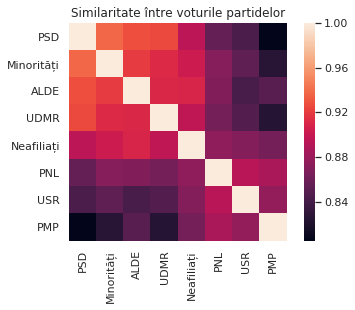

In [7]:
ax = sns.heatmap(sim_mat, square=True)

# https://stackoverflow.com/questions/56942670/matplotlib-seaborn-first-and-last-row-cut-in-half-of-heatmap-plot
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title('Similaritate între voturile partidelor')

In [8]:
sim_mat

,PSD,Minorități,ALDE,UDMR,Neafiliați,PNL,USR,PMP
PSD,1.000000,0.937844,0.928327,0.925807,0.894936,0.855735,0.843809,0.805041
Minorități,0.937844,1.000000,0.920128,0.912374,0.902873,0.870790,0.853351,0.826085
ALDE,0.928327,0.920128,1.000000,0.911603,0.909565,0.868766,0.842637,0.849273
UDMR,0.925807,0.912374,0.911603,1.000000,0.896929,0.863439,0.847528,0.824236
Neafiliați,0.894936,0.902873,0.909565,0.896929,1.000000,0.875373,0.869981,0.863350
PNL,0.855735,0.870790,0.868766,0.863439,0.875373,1.000000,0.893486,0.888035
USR,0.843809,0.853351,0.842637,0.847528,0.869981,0.893486,1.000000,0.876874
PMP,0.805041,0.826085,0.849273,0.824236,0.863350,0.888035,0.876874,1.000000


# Ce înseamnă toate acestea?
* Partidele sunt destul de similare (de exemplu, cele mai diferite partide, PSD și PMP, au votat similar la 80% din voturi).
* Avem de unde alege (există diferențe în acele 20% rămase).
* Urmăriți acest blog pentru partea a 2-a!

In [35]:
def distanta(x1, y1, x2, y2):
    return np.sqrt((x2-x1)**2 + (y2-y1)**2)

class PartideLocalizate:
    def __init__(self, sim_mat):
        self.distante = 1-sim_mat
        
        def rnd():
            return np.random.random(len(coloane_partide))*.00001
        
        self.xs = pd.Series(rnd(), index=coloane_partide, name='xs')
        self.ys = pd.Series(rnd(), index=coloane_partide, name='ys')
    
    def _to_coeff(self):
        return pd.concat([self.xs, self.ys])
    
    def _from_coeff(self, coeff):
        self.xs = pd.Series(coeff[:8], index=coloane_partide, name='xs')
        self.ys = pd.Series(coeff[8:], index=coloane_partide, name='ys')
    
        # Fixarea extremelor, pentru un grafic consistent de la o rulare la alta
        ex1, ex2 = 'PSD', 'PMP'
    
        d_extrem = 1-sim_mat.loc[ex1, ex2]
        self.xs[ex1] = -d_extrem/2
        self.ys[ex1] = 0
        self.xs[ex2] = d_extrem/2
        self.ys[ex2] = 0
    
    def _err(self, coeff):
        distante_estimate = sim_mat.copy()
        distante_estimate[:] = 0
        
        self._from_coeff(coeff)
        
        for p1 in coloane_partide:
            for p2 in coloane_partide:
                if not distante_estimate.loc[p1, p2]:
                    s = distanta(self.xs[p1], self.ys[p1], self.xs[p2], self.ys[p2])
                    distante_estimate.loc[p1, p2] = s
                    distante_estimate.loc[p2, p1] = s
        return ((self.distante - distante_estimate)**2).mean().mean()
    
    def pos_mat(self):
        return pd.concat([self.xs, self.ys], axis=1)
    
    def __str__(self):
        return str(self.pos_mat())
    
    def __repr__(self):
        return self.__str__()

In [41]:
pl = PartideLocalizate(sim_mat)
print(pl._err(pl._to_coeff()))

result = minimize(
    pl._err, 
    pl._to_coeff(), 
    tol=0.00001
)
print(result)

0.00754111238380915
      fun: 0.0004511682241448211
 hess_inv: array([[  1.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   6.98021185,   1.59150811,   0.22527117,
         -0.82264119,   1.65982701,  -1.26754393,   0.        ,
          0.        ,   3.62943151,   2.30337489,   4.27822629,
          0.76651271,  -3.03249503,  -1.27550938,   0.        ],
       [  0.        ,   1.59150811,   9.32257498,   2.05924397,
          1.52468177,   2.71709096,  -3.85593813,   0.        ,
          0.        ,  10.94311848,   1.74799033,   3.82598797,
          6.44308203,  -4.74676805,  -2.55872831,   0.        ],
       [  0.        ,   0.22527117,   2.05924397,   6.24783072,
          3.45563013,   2.41212296,   2.24803044,   0.        ,
          0.        ,   1.93427795,  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                  xs        ys  membri           color
PSD        -0.078927  0.036180     140             red
Minorități -0.045819  0.028190      17         fuchsia
ALDE       -0.020201  0.064223      19  cornflowerblue
UDMR       -0.080123 -0.023445      21     forestgreen
Neafiliați -0.019324 -0.043954      25            grey
PNL         0.067713 -0.011105      68          yellow
USR         0.060649 -0.086269      27         skyblue
PMP         0.116032  0.036180      12     yellowgreen


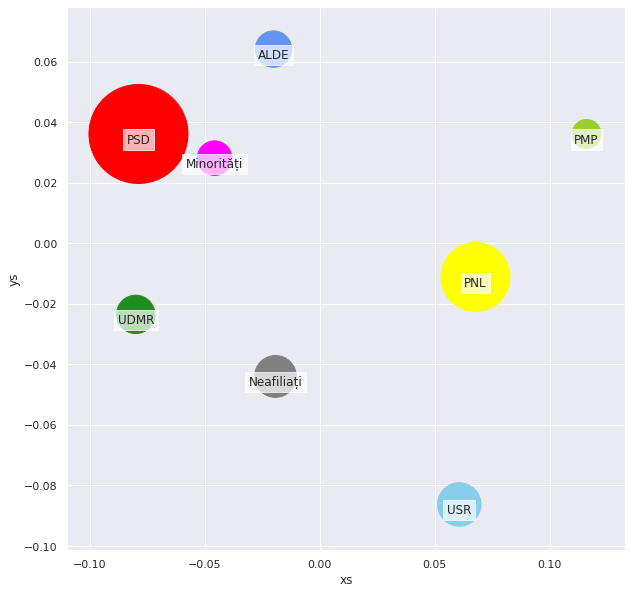

In [42]:
pl._from_coeff(result.x)
df = pl.pos_mat()
df -= df.mean() # Centreaza

marimi = membri.groupby('partid').count()['nume']
marimi.name = 'membri'
df = df.join(marimi)

colors = pd.Series({
    'PSD': 'red', 
    'ALDE': 'cornflowerblue', 
    'PNL': 'yellow', 
    'USR': 'skyblue', 
    'Minorități': 'fuchsia',
    'UDMR': 'forestgreen',
    'Neafiliați': 'grey',
    'PMP': 'yellowgreen'
    }, name='color'
)
df = df.join(colors)

ax = df.plot.scatter(x='xs', y='ys', alpha=0, figsize=(10, 10))

print(df)

ax.scatter(df['xs'], df['ys'], s=df['membri']*70, c=df['color'])

for key, row in df.iterrows():
    ax.annotate(
        key, 
        xy=(row['xs'], row['ys']-0.003), 
        ha='center', 
        fontsize='large',
        bbox={'boxstyle': 'square', 'alpha':0.7, 'color':'white'}
    )
    pass

In [43]:
voturi = normalize()

def mk_axa(axa):
    return pd.DataFrame({'scor': (voturi * df[axa]).sum(axis=1), 'pozitie': 'pro'})

orizontala, verticala = mk_axa('xs'), mk_axa('ys')


link_cdep(orizontala, 5, 'X +')
link_cdep(verticala, 5, 'Y +')

verticala['scor'] = 1-verticala['scor']
orizontala['scor'] = 1-orizontala['scor']


link_cdep(orizontala, 5, 'X -')
link_cdep(verticala, 5, 'Y -')

### X +

[Vot 22079](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22079): scor 0.213 pro anchetei despre neutralitatea Consiliul Național al Audiovizualului în 2018-2019

[Vot 20417](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20417): scor 0.192 pro anchetei privind interceptări ilegale cerute de Dragnea

[Vot 17262](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17262): scor 0.191 pro anchetei despre pensionarea şi reangajarea aceloraşi persoane în MAI

[Vot 20120](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20120): scor 0.185 pro readucerii pe ordinea de zi a voturilor amânate de PSD

[Vot 20402](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20402): scor 0.111 pro evaluării eficienței combaterii pestei porcine africane

### Y +

[Vot 22165](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22165): scor 0.122  

[Vot 22309](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22309): scor 0.109  

[Vot 22381](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22381): scor 0.108  

[Vot 21082](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21082): scor 0.107  

[Vot 22380](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22380): scor 0.106 pro modificării Legii fondului funciar 18/1991 a.î. să permită cereri de reconstituire a dreptului la proprietate oricând

### X -

[Vot 21081](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21081): scor 1.228  

[Vot 21086](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21086): scor 1.228  

[Vot 21094](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21094): scor 1.225  

[Vot 21105](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21105): scor 1.224  

[Vot 21088](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21088): scor 1.224  

### Y -

[Vot 20403](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20403): scor 1.101 pro anchetei despre reprimarea protestului pașnic din 10 august 2018

[Vot 20402](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20402): scor 1.095 pro evaluării eficienței combaterii pestei porcine africane

[Vot 22468](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22468): scor 1.076 pro alegerii decanilor prin vot, nu cum e acum, prin numire de către rector

[Vot 22079](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22079): scor 1.070 pro anchetei despre neutralitatea Consiliul Național al Audiovizualului în 2018-2019

[Vot 16168](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16168): scor 1.065  

In [44]:
normalize().std(axis=1)

cod cdep
16105    0.317975
16106    0.316438
16107    0.129464
16108    0.391059
16109    0.096867
           ...   
22897    0.122501
22898    0.286923
22899    0.125604
22900    0.135103
22901    0.349707
Length: 1601, dtype: float64

In [45]:
deviatie_medie = normalize().std(axis=1)

display(Markdown('## Voturi cu deviație mare'))
link_cdep(deviatie_medie, 20)

display(Markdown('## Voturi cu deviație mică'))
link_cdep(-deviatie_medie, 250)

## Voturi cu deviație mare

[Vot 22380](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22380): scor 0.490 în vederea modificării Legii fondului funciar 18/1991 a.î. să permită cereri de reconstituire a dreptului la proprietate oricând

[Vot 21081](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21081): scor 0.482  

[Vot 21086](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21086): scor 0.482  

[Vot 21085](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21085): scor 0.477 în vederea aprobării bugetului CDEP pentru anul 2019; au crescut cheltuielile cu 15% (salarii, pensii speciale)

[Vot 21082](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21082): scor 0.474  

[Vot 21083](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21083): scor 0.474  

[Vot 21084](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21084): scor 0.474 în vederea permutării a doi membri PSD în comisiile permanente ale CDEP

[Vot 22381](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22381): scor 0.473  

[Vot 21094](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21094): scor 0.470  

[Vot 21090](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21090): scor 0.468  

[Vot 21105](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21105): scor 0.468  

[Vot 21087](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21087): scor 0.468 în vederea împăcării unor legi despre achiziții publice

[Vot 21088](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21088): scor 0.468  

[Vot 21107](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21107): scor 0.467  

[Vot 21099](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21099): scor 0.466  

[Vot 21101](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21101): scor 0.465  

[Vot 21120](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21120): scor 0.464  

[Vot 21092](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21092): scor 0.461 în vederea scoaterii normativelor de cost pentru investiții din fonduri publice (pentru unii, cec în alb, pentru alții, deblocarea investițiilor)

[Vot 21095](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21095): scor 0.459  

[Vot 21093](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21093): scor 0.459  

## Voturi cu deviație mică

[Vot 19272](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19272): scor -0.029  

[Vot 16491](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16491): scor -0.030  

[Vot 16505](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16505): scor -0.039  

[Vot 16513](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16513): scor -0.039  

[Vot 16514](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16514): scor -0.042  

[Vot 20658](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20658): scor -0.046  

[Vot 19271](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19271): scor -0.046  

[Vot 19273](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19273): scor -0.047  

[Vot 16205](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16205): scor -0.048  

[Vot 16197](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16197): scor -0.048  

[Vot 16488](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16488): scor -0.049  

[Vot 16214](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16214): scor -0.049  

[Vot 18843](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18843): scor -0.049  

[Vot 16692](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16692): scor -0.050  

[Vot 19264](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19264): scor -0.050  

[Vot 19265](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19265): scor -0.050  

[Vot 22665](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22665): scor -0.051  

[Vot 16207](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16207): scor -0.051  

[Vot 22664](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22664): scor -0.051  

[Vot 18889](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18889): scor -0.052  

[Vot 17250](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17250): scor -0.052  

[Vot 16196](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16196): scor -0.052  

[Vot 16504](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16504): scor -0.054  

[Vot 16502](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16502): scor -0.054  

[Vot 16501](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16501): scor -0.055  

[Vot 18872](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18872): scor -0.055  

[Vot 16503](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16503): scor -0.055  

[Vot 19314](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19314): scor -0.056  

[Vot 16203](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16203): scor -0.056  

[Vot 16506](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16506): scor -0.057  

[Vot 16495](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16495): scor -0.058  

[Vot 16215](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16215): scor -0.058  

[Vot 16493](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16493): scor -0.058  

[Vot 19310](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19310): scor -0.059  

[Vot 19309](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19309): scor -0.059  

[Vot 16224](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16224): scor -0.059  

[Vot 19325](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19325): scor -0.059  

[Vot 20828](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20828): scor -0.060  

[Vot 18833](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18833): scor -0.060  

[Vot 16211](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16211): scor -0.060  

[Vot 19280](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19280): scor -0.060  

[Vot 16195](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16195): scor -0.060  

[Vot 17451](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17451): scor -0.061  

[Vot 16199](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16199): scor -0.062  

[Vot 16220](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16220): scor -0.062  

[Vot 17253](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17253): scor -0.062  

[Vot 19313](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19313): scor -0.062  

[Vot 19266](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19266): scor -0.062  

[Vot 17442](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17442): scor -0.063  

[Vot 17236](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17236): scor -0.063  

[Vot 18870](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18870): scor -0.063  

[Vot 16219](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16219): scor -0.063  

[Vot 17244](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17244): scor -0.063  

[Vot 18830](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18830): scor -0.063  

[Vot 18835](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18835): scor -0.063  

[Vot 16210](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16210): scor -0.063  

[Vot 20655](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20655): scor -0.064  

[Vot 19330](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19330): scor -0.064  

[Vot 20815](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20815): scor -0.064  

[Vot 18781](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18781): scor -0.064  

[Vot 20654](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20654): scor -0.064  

[Vot 17285](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17285): scor -0.065  

[Vot 17284](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17284): scor -0.065  

[Vot 18785](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18785): scor -0.065  

[Vot 17441](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17441): scor -0.065  

[Vot 19262](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19262): scor -0.065  

[Vot 22729](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22729): scor -0.065  

[Vot 18873](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18873): scor -0.066  

[Vot 18788](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18788): scor -0.066  

[Vot 20527](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20527): scor -0.066  

[Vot 20812](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20812): scor -0.066  

[Vot 20651](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20651): scor -0.066  

[Vot 16213](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16213): scor -0.067  

[Vot 19274](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19274): scor -0.067  

[Vot 18789](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18789): scor -0.067  

[Vot 16204](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16204): scor -0.068  

[Vot 18875](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18875): scor -0.068  

[Vot 19275](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19275): scor -0.068  

[Vot 22532](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22532): scor -0.068  

[Vot 20522](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20522): scor -0.068  

[Vot 17259](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17259): scor -0.068  

[Vot 20826](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20826): scor -0.069  

[Vot 17444](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17444): scor -0.069  

[Vot 18892](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18892): scor -0.069  

[Vot 20660](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20660): scor -0.069  

[Vot 20600](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20600): scor -0.069  

[Vot 18882](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18882): scor -0.069  

[Vot 19276](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19276): scor -0.069  

[Vot 16233](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16233): scor -0.069  

[Vot 17304](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17304): scor -0.069  

[Vot 18891](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18891): scor -0.070  

[Vot 18780](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18780): scor -0.071  

[Vot 16225](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16225): scor -0.071  

[Vot 19263](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19263): scor -0.071  

[Vot 16299](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16299): scor -0.071  

[Vot 20822](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20822): scor -0.071  

[Vot 18877](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18877): scor -0.072  

[Vot 22731](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22731): scor -0.072  

[Vot 16281](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16281): scor -0.072  

[Vot 22668](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22668): scor -0.072  

[Vot 16802](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16802): scor -0.073  

[Vot 19278](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19278): scor -0.073  

[Vot 18839](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18839): scor -0.073  

[Vot 18834](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18834): scor -0.073  

[Vot 17302](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17302): scor -0.073  

[Vot 19261](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19261): scor -0.073  

[Vot 20523](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20523): scor -0.073  

[Vot 17300](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17300): scor -0.074  

[Vot 19312](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19312): scor -0.074  

[Vot 16212](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16212): scor -0.074  

[Vot 22737](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22737): scor -0.074  

[Vot 18793](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18793): scor -0.074  

[Vot 16852](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16852): scor -0.075  

[Vot 17305](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17305): scor -0.075  

[Vot 19269](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19269): scor -0.075  

[Vot 17306](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17306): scor -0.075  

[Vot 18869](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18869): scor -0.075  

[Vot 18888](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18888): scor -0.075  

[Vot 19329](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19329): scor -0.075  

[Vot 17237](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17237): scor -0.075  

[Vot 22536](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22536): scor -0.075  

[Vot 20090](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20090): scor -0.075  

[Vot 20596](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20596): scor -0.076  

[Vot 18784](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18784): scor -0.076  

[Vot 18838](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18838): scor -0.076  

[Vot 18783](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18783): scor -0.076  

[Vot 17438](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17438): scor -0.076  

[Vot 22735](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22735): scor -0.077  

[Vot 22734](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22734): scor -0.077  

[Vot 17286](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17286): scor -0.077  

[Vot 19315](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19315): scor -0.077  

[Vot 20526](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20526): scor -0.077  

[Vot 16960](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16960): scor -0.077  

[Vot 17282](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17282): scor -0.077  

[Vot 16500](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16500): scor -0.077  

[Vot 17412](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17412): scor -0.078  

[Vot 20646](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20646): scor -0.078  

[Vot 19283](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19283): scor -0.078  

[Vot 17017](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17017): scor -0.078  

[Vot 17414](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17414): scor -0.078  

[Vot 17261](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17261): scor -0.079  

[Vot 19323](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19323): scor -0.079  

[Vot 18795](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18795): scor -0.079  

[Vot 16235](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16235): scor -0.079  

[Vot 17082](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17082): scor -0.079  

[Vot 18887](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18887): scor -0.079  

[Vot 18779](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18779): scor -0.079  

[Vot 17440](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17440): scor -0.079  

[Vot 16558](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16558): scor -0.079  

[Vot 22730](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22730): scor -0.079  

[Vot 17307](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17307): scor -0.079  

[Vot 17338](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17338): scor -0.079  

[Vot 17443](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17443): scor -0.080  

[Vot 18844](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18844): scor -0.080  

[Vot 17314](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17314): scor -0.080  

[Vot 17413](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17413): scor -0.080  

[Vot 19317](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19317): scor -0.080  

[Vot 20652](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20652): scor -0.080  

[Vot 22520](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22520): scor -0.080  

[Vot 20817](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20817): scor -0.081  

[Vot 19320](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19320): scor -0.081  

[Vot 20096](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20096): scor -0.081  

[Vot 18790](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18790): scor -0.081  

[Vot 17317](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17317): scor -0.081  

[Vot 16892](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16892): scor -0.081  

[Vot 19308](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19308): scor -0.081  

[Vot 16801](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16801): scor -0.082  

[Vot 17448](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17448): scor -0.083  

[Vot 17080](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17080): scor -0.083  

[Vot 20073](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20073): scor -0.083  

[Vot 17319](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17319): scor -0.083  

[Vot 17199](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17199): scor -0.083  

[Vot 16227](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16227): scor -0.083  

[Vot 19277](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19277): scor -0.083  

[Vot 17255](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17255): scor -0.083  

[Vot 17410](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17410): scor -0.083  

[Vot 22533](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22533): scor -0.084  

[Vot 17445](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17445): scor -0.084  

[Vot 22525](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22525): scor -0.084  

[Vot 22662](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22662): scor -0.084  

[Vot 21047](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21047): scor -0.084  

[Vot 17411](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17411): scor -0.085  

[Vot 20593](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20593): scor -0.085  

[Vot 16489](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16489): scor -0.085  

[Vot 19306](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19306): scor -0.085  

[Vot 16913](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16913): scor -0.085  

[Vot 17263](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17263): scor -0.085  

[Vot 19307](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19307): scor -0.085  

[Vot 21029](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=21029): scor -0.086  

[Vot 16510](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16510): scor -0.086  

[Vot 22524](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22524): scor -0.086  

[Vot 22641](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22641): scor -0.086  

[Vot 20639](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20639): scor -0.086  

[Vot 16559](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16559): scor -0.086  

[Vot 19319](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19319): scor -0.087  

[Vot 17079](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17079): scor -0.087  

[Vot 22531](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22531): scor -0.087  

[Vot 20657](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20657): scor -0.087  

[Vot 16961](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16961): scor -0.087  

[Vot 17335](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17335): scor -0.087  

[Vot 20474](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20474): scor -0.087  

[Vot 17254](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17254): scor -0.087  

[Vot 18893](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18893): scor -0.087  

[Vot 20594](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20594): scor -0.087  

[Vot 16282](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16282): scor -0.087  

[Vot 22527](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22527): scor -0.087  

[Vot 22738](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22738): scor -0.087  

[Vot 16560](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16560): scor -0.088  

[Vot 16965](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16965): scor -0.088  

[Vot 19207](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19207): scor -0.088  

[Vot 18896](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18896): scor -0.088  

[Vot 19322](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19322): scor -0.088  

[Vot 22845](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22845): scor -0.088  

[Vot 16239](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16239): scor -0.089  

[Vot 16226](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16226): scor -0.089  

[Vot 22470](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22470): scor -0.089  

[Vot 16585](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16585): scor -0.089  

[Vot 16790](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16790): scor -0.089  

[Vot 19103](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19103): scor -0.090  

[Vot 19324](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19324): scor -0.090  

[Vot 16193](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16193): scor -0.090  

[Vot 16131](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16131): scor -0.090  

[Vot 16586](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16586): scor -0.090  

[Vot 17222](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17222): scor -0.090  

[Vot 22856](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22856): scor -0.090  

[Vot 22247](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22247): scor -0.090  

[Vot 17446](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17446): scor -0.091  

[Vot 17197](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17197): scor -0.091  

[Vot 19112](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=19112): scor -0.091  

[Vot 17283](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17283): scor -0.091  

[Vot 22660](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22660): scor -0.091  

[Vot 16458](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16458): scor -0.091  

[Vot 17248](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17248): scor -0.091  

[Vot 16327](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16327): scor -0.091  

[Vot 22657](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=22657): scor -0.091  

[Vot 16589](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16589): scor -0.091  

[Vot 18832](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=18832): scor -0.091  

[Vot 20473](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20473): scor -0.091  

[Vot 20069](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20069): scor -0.091  

[Vot 17016](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17016): scor -0.091  

[Vot 16192](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16192): scor -0.091  

[Vot 16571](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16571): scor -0.091  

[Vot 16249](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16249): scor -0.092  

[Vot 17226](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17226): scor -0.092  

[Vot 16880](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16880): scor -0.092  

[Vot 17401](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17401): scor -0.092  

[Vot 17280](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=17280): scor -0.092  

[Vot 20521](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=20521): scor -0.092  

[Vot 16914](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16914): scor -0.092  

[Vot 16849](http://www.cdep.ro/pls/steno/evot2015.nominal?idv=16849): scor -0.092  